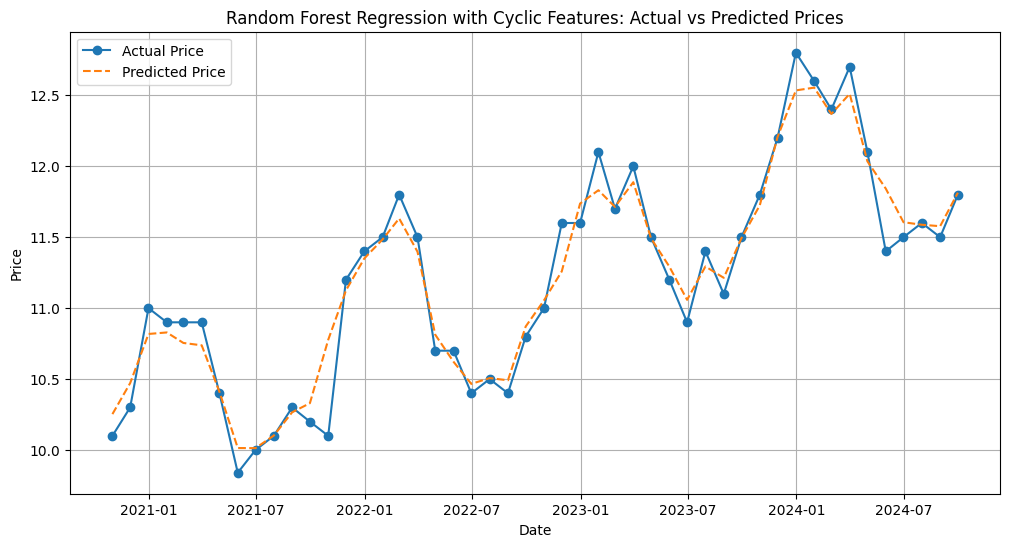

Mean Squared Error: 0.0893
Predicted price for 7/31/25: 11.61


/tmp/ipykernel_98139/4184206626.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])
/home/user/anaconda3/envs/modulusym/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/user/anaconda3/envs/modulusym/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


# Step 7: Define prediction function
def predict_price(date_str):
    """
    Predict the price for a given date.

    Parameters:
        date_str (str): Date in MM/DD/YY format.

    Returns:
        float: Predicted price.
        
    Replace the .csv folder destination acordingly
    """
    data = pd.read_csv("Downloads/Nat_Gas.csv")
    df = pd.DataFrame(data)
    
    # Step 2: Preprocess the dates
    reference_date = pd.to_datetime("2018-10-31")
    df["Date"] = pd.to_datetime(df["Date"])
    df["Days_Since_Ref"] = (df["Date"] - reference_date).dt.days
    
    # Add cyclic features for month and year
    df["Month"] = df["Date"].dt.month
    df["Month_Sin"] = np.sin(2 * np.pi * df["Month"] / 12)
    df["Month_Cos"] = np.cos(2 * np.pi * df["Month"] / 12)
    
    # Normalize the time feature
    scaler_time = MinMaxScaler()
    df["Normalized_Time"] = scaler_time.fit_transform(df[["Days_Since_Ref"]])
    
    # Step 3: Prepare data for training
    X = df[["Normalized_Time", "Month_Sin", "Month_Cos"]]
    y = df["Price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Step 4: Train RandomForest model
    rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Step 5: Make predictions
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.4f}")
    
    # Predict on full dataset for visualization
    df["Predicted_Price"] = rf_model.predict(X)
    try:
        input_date = pd.to_datetime(date_str)
        days_since_ref = (input_date - reference_date).days
        month = input_date.month
        month_sin = np.sin(2 * np.pi * month / 12)
        month_cos = np.cos(2 * np.pi * month / 12)
        normalized_time = scaler_time.transform([[days_since_ref]])[0][0]
        features = [[normalized_time, month_sin, month_cos]]
        predicted_price = rf_model.predict(features)[0]
        return predicted_price
    except Exception as e:
        print(f"Error in prediction: {e}")
        return None

# Example usage
example_date = "7/31/25"
predicted = predict_price(example_date)
print(f"Predicted price for {example_date}: {predicted:.2f}")


/tmp/ipykernel_98139/2727472759.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


Mean Squared Error: 0.0893


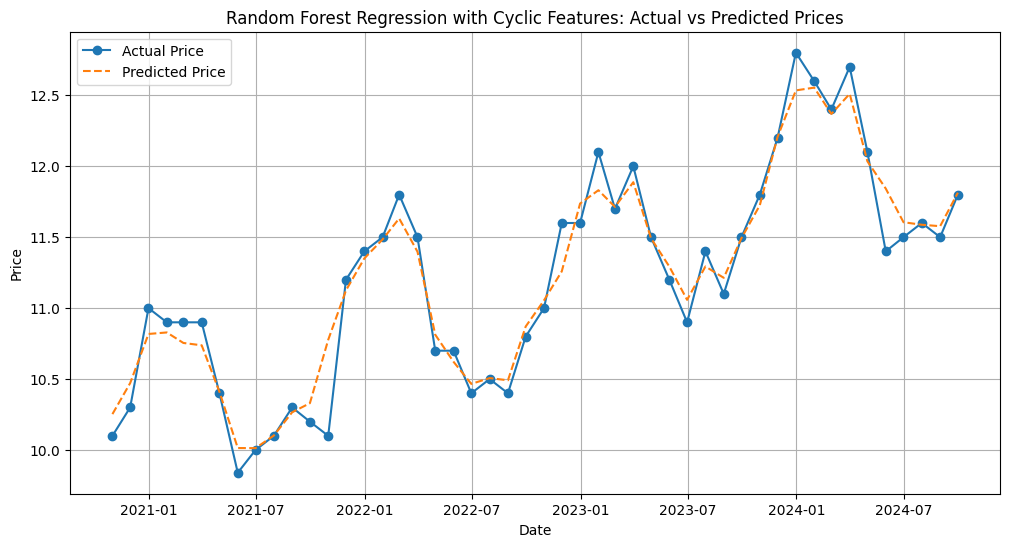

2053499.9999999998 : gross profit
1800000 : total storage cost
30000.0 : total injection cost
223499.99999999977


/home/user/anaconda3/envs/modulusym/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/user/anaconda3/envs/modulusym/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/user/anaconda3/envs/modulusym/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/user/anaconda3/envs/modulusym/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/home/user/anaconda3/envs/modulusym/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the data
data = pd.read_csv("Downloads/Nat_Gas.csv")
df = pd.DataFrame(data)

# Step 2: Preprocess the dates
reference_date = pd.to_datetime("2018-10-31")
df["Date"] = pd.to_datetime(df["Date"])
df["Days_Since_Ref"] = (df["Date"] - reference_date).dt.days

# Add cyclic features for month and year
df["Month"] = df["Date"].dt.month
df["Month_Sin"] = np.sin(2 * np.pi * df["Month"] / 12)
df["Month_Cos"] = np.cos(2 * np.pi * df["Month"] / 12)

# Normalize the time feature
scaler_time = MinMaxScaler()
df["Normalized_Time"] = scaler_time.fit_transform(df[["Days_Since_Ref"]])

# Step 3: Prepare data for training
X = df[["Normalized_Time", "Month_Sin", "Month_Cos"]]
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train RandomForest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Predict on full dataset for visualization
df["Predicted_Price"] = rf_model.predict(X)

# Step 6: Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Price"], label="Actual Price", marker="o")
plt.plot(df["Date"], df["Predicted_Price"], label="Predicted Price", linestyle="--")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Random Forest Regression with Cyclic Features: Actual vs Predicted Prices")
plt.legend()
plt.grid()
plt.show()

# Step 7: Define prediction function
def predict_price(date_str):
    """
    Predict the price for a given date.

    Parameters:
        date_str (str): Date in MM/DD/YY format.

    Returns:
        float: Predicted price.
    """
    try:
        input_date = pd.to_datetime(date_str)
        days_since_ref = (input_date - reference_date).days
        month = input_date.month
        month_sin = np.sin(2 * np.pi * month / 12)
        month_cos = np.cos(2 * np.pi * month / 12)
        normalized_time = scaler_time.transform([[days_since_ref]])[0][0]
        features = [[normalized_time, month_sin, month_cos]]
        predicted_price = rf_model.predict(features)[0]
        return predicted_price
    except Exception as e:
        print(f"Error in prediction: {e}")
        return None

# Step 8: Define contract pricing function
def price_contract(injection_dates, withdrawal_dates, injection_rate, withdrawal_rate, max_volume, storage_cost, injection_cost):
    """
    Calculate the value of a gas storage contract.

    Parameters:
        injection_dates (list of str): Dates for gas injection in MM/DD/YY format.
        withdrawal_dates (list of str): Dates for gas withdrawal in MM/DD/YY format.
        injection_rate (float): Rate of gas injection (MMBtu/day).
        withdrawal_rate (float): Rate of gas withdrawal (MMBtu/day).
        max_volume (float): Maximum storage capacity (MMBtu).
        storage_cost (float): Monthly storage cost ($).
        injection_cost (float): Cost per MMBtu for injection ($/MMBtu).
        withdrawal_cost (float): Cost per MMBtu for withdrawal ($/MMBtu).

    Returns:
        float: Value of the contract ($).
    """
    total_injection_volume = min(len(injection_dates) * injection_rate, max_volume)
    total_withdrawal_volume = min(len(withdrawal_dates) * withdrawal_rate, total_injection_volume)

    # Predict prices for injection and withdrawal dates
    injection_prices = np.array([predict_price(date) for date in injection_dates])
    withdrawal_prices = np.array([predict_price(date) for date in withdrawal_dates])

    # Calculate total prices
    total_injection_price = np.sum(injection_prices)
    total_withdrawal_price = np.sum(withdrawal_prices)

    # Calculate gross profit
    gross_profit = (total_withdrawal_price - total_injection_price)*10**6

    def months_between_dates(injection_dates, withdrawal_dates):
        months_difference = []
        for inj_date, with_date in zip(injection_dates, withdrawal_dates):
            inj_date = datetime.strptime(inj_date, "%m/%d/%y")
            with_date = datetime.strptime(with_date, "%m/%d/%y")
            diff_months = (with_date.year - inj_date.year) * 12 + (with_date.month - inj_date.month)
            months_difference.append(diff_months)
        return np.array(months_difference)

    storage_months = months_between_dates(injection_dates, withdrawal_dates)

    print(gross_profit, ": gross profit")
    #print((storage_months))

    # Calculate total costs
    total_storage_cost = np.sum(storage_cost * storage_months)
    print(total_storage_cost, ": total storage cost")
    total_injection_cost = np.sum(injection_cost * total_injection_volume)
    print(total_injection_cost, ": total injection cost")

    # Net contract value
    contract_value = gross_profit - (total_storage_cost + total_injection_cost)

    return contract_value
    

# Example usage
injection_dates = ["6/1/24", "6/2/24", "6/3/24"]
withdrawal_dates = ["12/1/24", "12/2/24", "12/3/24"]
injection_rate = 1e3  # MMBtu/day
withdrawal_rate = 1e3  # MMBtu/day
max_volume = 5e6  # MMBtu
storage_cost = 100000  # $/month
injection_cost = 10  # $/MMBtu


contract_value = price_contract(
    injection_dates,
    withdrawal_dates,
    injection_rate,
    withdrawal_rate,
    max_volume,
    storage_cost,
    injection_cost
)
print(contract_value)


In [14]:
from datetime import datetime

injection_dates = ["6/1/24", "6/2/24", "6/3/24"]
withdrawal_dates = ["12/1/24", "12/2/24", "9/3/24"]

def months_between_dates(injection_dates, withdrawal_dates):
    months_difference = []
    for inj_date, with_date in zip(injection_dates, withdrawal_dates):
        inj_date = datetime.strptime(inj_date, "%m/%d/%y")
        with_date = datetime.strptime(with_date, "%m/%d/%y")
        diff_months = (with_date.year - inj_date.year) * 12 + (with_date.month - inj_date.month)
        months_difference.append(diff_months)
    return months_difference

months_diff = months_between_dates(injection_dates, withdrawal_dates)
print(months_diff)


[6, 6, 3]
